# Caracterización probabilistica de variables aleatorias

### Ejercicio práctico de caracterización de variables aleatorias continuas en la ingeniería de confiabilidad por medio del uso de Python y sus librerías.

Ejercicio #2 - Caracterización probabilista de las variables de estudio.
Inicialmente retomaremos el análisis descriptivo realizado en el articulo anterior; esta vez analizaremos ambas variables y replicaremos las conclusiones básicas que a las que podemos llegar a través de la analítica descriptiva. Luego continuaremos con el análisis de confiabilidad; en esta ocasión determinaremos cual de las diferentes distribuciones de confiabilidad se ajusta mas adecuadamente a nuestros datos. A continuación el conjunto de datos a analizar.

In [2]:
#Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math as mth
import os
import sys
sys.path.insert(0, os.path.abspath('..\CONFIABILIDAD INTEGRAL'))
import scripts

In [5]:
# Cargamos la data de yacimientos, esta es levemente diferente a la data del ejercicio anterior ya que contiene una variable 
# adicional per menos puntos.

data = pd.read_csv("DATOS YACIMIENTOS.csv")
data.head()

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
0,0.212,118.00,0.198
1,0.217,121.00,0.200
2,0.204,114.25,0.208
3,0.206,76.00,0.204
4,0.209,72.00,0.198


In [8]:
# Revisamos la integridad de la data. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SATURACION (Sw)  47 non-null     float64
 1   ARENA (ANP)      47 non-null     float64
 2   POROSIDAD (F)    47 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [7]:
# Cargamos la variable Porosidad únicamente para el análisis
porosidad = data["POROSIDAD (F)"]

Analizamos la variable porosidad por medio de la función histo_frec y histo_cum desarrolladas en el artículo anterior. Esta vez la función se puede encontrar en el archivo scripts.py donde se almacenan todos los desarrollos de código asociado a los artículos.

***Analisis del histrograma de frecuencias***

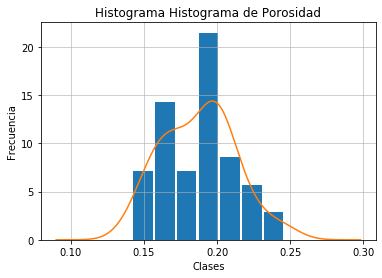

(None,
              Clases  # Puntos  Probabilidad   Densidad
 0   (0.142, 0.1569)         5        0.1064   7.160393
 1  (0.1569, 0.1717)        10        0.2128  14.320786
 2  (0.1717, 0.1866)         5        0.1064   7.160393
 3  (0.1866, 0.2014)        15        0.3191  21.481178
 4  (0.2014, 0.2163)         6        0.1277   8.592471
 5  (0.2163, 0.2311)         4        0.0851   5.728314
 6   (0.2311, 0.246)         2        0.0426   2.864157)

In [10]:
# Llamamos la función histo_frec
scripts.histo_frec(porosidad,"Histograma de Porosidad")

Del histograma de frecuencias construido para la variable aleatoria “Porosidad” podemos inferir lo siguiente:

1. p(Poro = 0.20 micras ) = 31 %  (probabilidad de que la porosidad tome el valor de 0,21 micras )
2. p(Poro > 0.20 micras ) = 13 % (probabilidad de que la porosidad tome el valor de 0,22 micras
3. p(0.2163 ≤ P < 0.246  micras) = 12 % (probabilidad de que la porosidad tome valores mayores o iguales a 0.2279 micras y menores de 0.2357 micras )
4. El 43% de probabilidad de ocurrencia está ubicado en el rango que va desde 0.1966 hasta 0.2163 micras

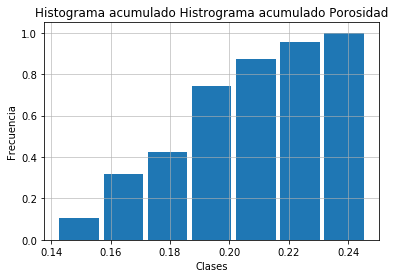

(None,
              Clases  # Puntos  Probabilidad
 0   (0.142, 0.1569)         5      0.106383
 1  (0.1569, 0.1717)        10      0.319149
 2  (0.1717, 0.1866)         5      0.425532
 3  (0.1866, 0.2014)        15      0.744681
 4  (0.2014, 0.2163)         6      0.872340
 5  (0.2163, 0.2311)         4      0.957447
 6   (0.2311, 0.246)         2      1.000000)

In [11]:
# Llamamos la función histo_cum
scripts.histo_cum(porosidad,"Histrograma acumulado Porosidad")

Del Histograma Acumulado Directo construido para la variable aleatoria “Porosidad” podemos inferir entre otras cosas, lo siguiente:

1.	p(P ≤ 0.246 micras ) = 100% (probabilidad de que porosidad tome valores menores o iguales de 0.2436 micras es de 100%)
2.	p(P ≤ 0.2163 micras ) = 87% (probabilidad de que la porosidad tome valores menores o iguales de 0.2279 micras es de 85%)
3.	p(0.1866 < x < 0.2014)= 1-0.7446 =0.2554 =25.54% (probabilidad de que la porosidad tome estos valores.

In [12]:
# Describimos estadísticamente la variable porosidad
porosidad.describe()

count    47.000000
mean      0.187277
std       0.024606
min       0.142000
25%       0.169000
50%       0.189000
75%       0.202500
max       0.246000
Name: POROSIDAD (F), dtype: float64

### **Análisis estadístico de la variable Porosidad:**

Del presente análisis podemos concluir que el valor esperado X variará entre 0.1866 - 0.2014 con un nivel de confianza del 72% y un respectivo margen de error del 28%. Aunque no es un dato muy acertado, esta evaluación se ajusta a la distribución de los datos en el histograma.

### Distribuciones de probabilidad paramétricas

Algunas de las distribuciones de probabilidad paramétricas más usadas para
variables continuas son las siguientes:

• Distribución Normal
• Distribución Lognormal
• Distribución Exponencial
• Distribución Weibull
• Distribución Beta
• Distribución Gamma
• Distribución Triangular
• Distribución Uniforme

### Procedimiento de caracterización probabilista de variables aleatorias
Una de las funciones más delicada del ingeniero de confiabilidad y del analista de riesgo es seleccionar la distribución de probabilidad que más se adapte a una muestra de datos de la variable a modelar. De allí surge la gran pregunta: ¿Cuál es la distribución probabilística que con mayor precisión pudiera representar los datos?. Esta pregunta da inicio al proceso de caracterización probabilística de la variable.
El procedimiento para caracterizar y ajustar un distribución que describa correctamente los datos de una variable se compone de 4 pasos importantes:
1. Plantear las hipótesis de las distribuciones paramétricas que podrían hacer un buen ajuste con los datos.
2. Calcular los parámetros de cada una de las distribuciones hipótesis con los datos de la muestra.
3. Realizar alguna de las pruebas de bondad de ajuste.
4. Seleccionar entre las distribuciones hipotéticas no rechazadas, aquella que tenga el valor del test más bajo.

In [14]:
#Importamos el método Fit_everything
from reliability.Fitters import Fit_Everything
# Convertimos nuestros dataframes en arrays ya que Reliability tienen este requerimiento
porosidad= np.array(porosidad)
# Pasamos los datos de porosidad a la función, con los parámetros de gráficos con valor False para que para solo nos 
# entregue la tabla resumen de la evaluación de los modelos.
fit_porosidad = Fit_Everything(failures=porosidad, show_histogram_plot=False, show_probability_plot=False, show_PP_plot=False)

                     Alpha     Beta      Gamma        Mu     Sigma   Lambda        AICc         BIC
Distribution                                                                                       
Beta_2P            48.0931  208.708                                         -212.095910 -208.668342
Normal_2P                                       0.187277  0.024343          -211.604967 -208.177399
Weibull_3P       0.0591949  2.29094   0.134805                              -211.315611 -206.323307
Gamma_3P        0.00239848      103 -0.0597663                              -209.866961 -204.874658
Weibull_2P        0.198082  8.14332                                         -207.697305 -204.269737
Exponential_2P                           0.141                      21.6092 -190.600453 -187.172885
Gamma_2P         0.0126654  14.7864                                         -181.901417 -178.473849
Exponential_1P                                                       5.3397  -61.376963  -59.615704


('Beta_2P', array([ 48.09307052, 208.70755491]))

Como resultado obtenemos que la distribución que mejor se ajusta a nuestros datos de porosidad es la Beta de 2 parámetros, no obstante la distribución normal también se ajusta adecuadamente. Conociendo que este es un proceso natural y ante la facilidad de utilizarla escogemos finalmente ajusta los datos a la distribución Normal.

Si retiramos los argumentos adicionales que pasamos anteriormente enla función Fit_Everything podremos observar los gráficos de ajuste de cada distribución a nuestro set de datos de la siguiente manera:

                     Alpha     Beta      Gamma        Mu     Sigma   Lambda        AICc         BIC
Distribution                                                                                       
Beta_2P            48.0931  208.708                                         -212.095910 -208.668342
Normal_2P                                       0.187277  0.024343          -211.604967 -208.177399
Weibull_3P       0.0591949  2.29094   0.134805                              -211.315611 -206.323307
Gamma_3P        0.00239848      103 -0.0597663                              -209.866961 -204.874658
Weibull_2P        0.198082  8.14332                                         -207.697305 -204.269737
Exponential_2P                           0.141                      21.6092 -190.600453 -187.172885
Gamma_2P         0.0126654  14.7864                                         -181.901417 -178.473849
Exponential_1P                                                       5.3397  -61.376963  -59.615704


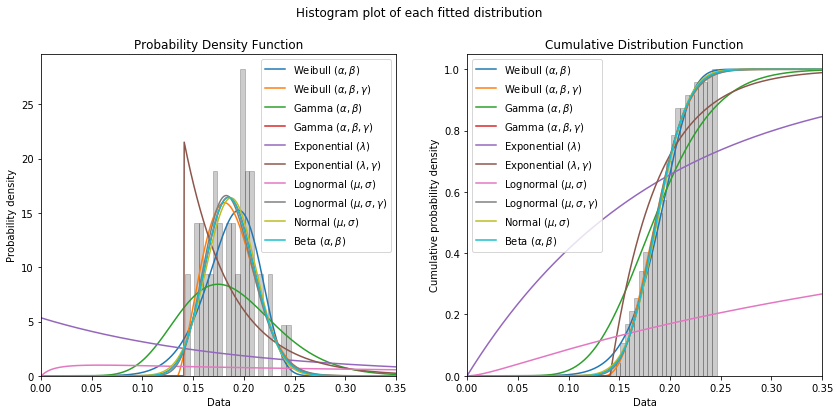

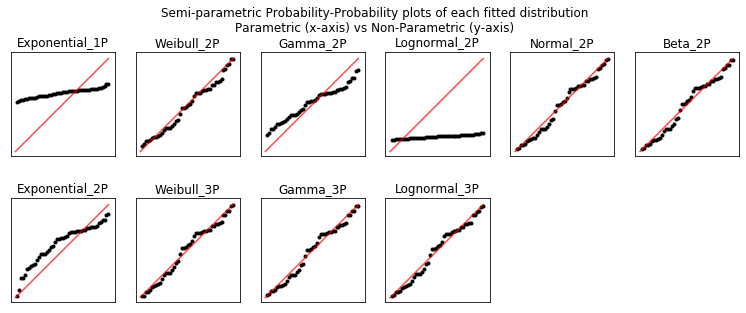

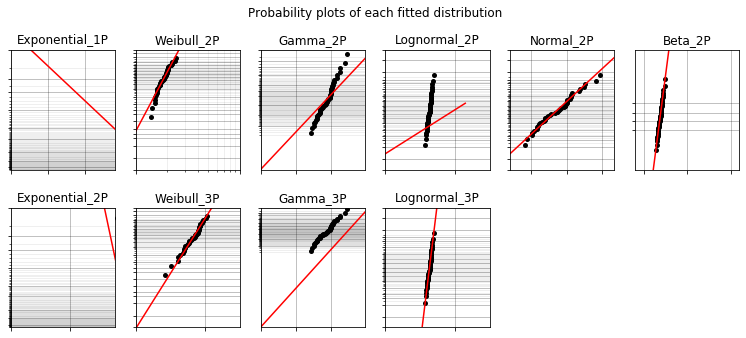

In [15]:
# Realizamos el ajuste sin los parámetros de gráficos
fit_porosidad = Fit_Everything(failures=porosidad)

De igual forma podemos observar los gráficos de probabilidad de cada una de las distribuciones observando visualmente que tanto la distribución normal como la Beta se ajustan a nuestro set de datos de porosidad.

### **Implementación de la distribución Normal a nuestro set de datos**
Para implentar la función mencionada hacemos uso del método Fit_distribution, para ajustarla a nuestro set de datos de la siguiente manera:

In [16]:
# Importamos la distribución deseada
from reliability.Fitters import Fit_Normal_2P
# Creamos el objeto fitted_porosidad con la función llamada sin graficar la curva de probabilidad. 
fitted_porosidad = Fit_Normal_2P(failures=porosidad, show_probability_plot=False )

Results from Fit_Normal_2P (95% CI):
           Point Estimate  Standard Error  Lower CI  Upper CI
Parameter                                                    
Mu               0.187277        0.003551  0.180317  0.194236
Sigma            0.024343        0.002511  0.019887  0.029797
Log-Likelihood: 107.93884703653659


Se denota que por defecto el intervalo de confianza es del 95%, este puede ser ajustado como parámetro al realizar el ajuste inicial. Realizamos adicionalmente la consulta de los valores estadísticos mas importantes de nuestra distribución ajustada:

In [17]:
#Por medio del método y función .distribution.stats() obtenemos las estadísticas de nuestra función. 
fitted_porosidad.distribution.stats()

Descriptive statistics for Normal distribution with mu = 0.1872765957446808 and sigma = 0.0243430291718617
Mean =  0.1872765957446808
Median = 0.1872765957446808
Mode = 0.1872765957446808
5th quantile = 0.14723587592035858
95th quantile = 0.22731731556900303
Standard deviation = 0.0243430291718617
Variance = 0.0005925830692621098
Skewness = 0
Excess kurtosis = 0


Este resultado, aunque es similar al análisis estadístico realizado anteriormente nos permite asegurar con mucho mayor certeza y confianza la veracidad de los mismos, por otra parte al tener la distribución adecuada para nuestros datos y a través de las curvas de CDF y SF obtendremos la probabilidad real de que un dato tome el valor descrito en el intervalo.

### **Diagrama de Probabilidad**
Una gráfica de probabilidad muestra qué tan bien están modelados sus datos por una distribución particular. Al escalar los ejes de tal manera que la función acumulada de densidad (CDF) de la distribución ajustada parece ser una línea recta, podemos juzgar si el CDF empírico de los datos de falla (los puntos negros) están de acuerdo con el CDF de la distribución ajustada.

In [18]:
# Importamos la librería para ajuste de puntos.
from reliability.Probability_plotting import plot_points

Existen dos formas de obtener el diagrama de probabilidad:
1. Directamente al ajustar la función encontrada

Results from Fit_Normal_2P (95% CI):
           Point Estimate  Standard Error  Lower CI  Upper CI
Parameter                                                    
Mu               0.187277        0.003551  0.180317  0.194236
Sigma            0.024343        0.002511  0.019887  0.029797
Log-Likelihood: 107.93884703653659


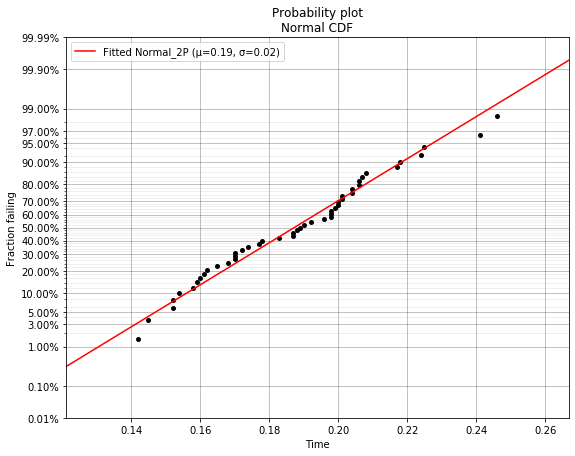

In [19]:
#Para graficar el diagrama de probabilidad simplemente quitamos la opción show_probability_plot=False
fitted_porosidad = Fit_Normal_2P(failures=porosidad)

2. De los parámetros de la curva obtenidos

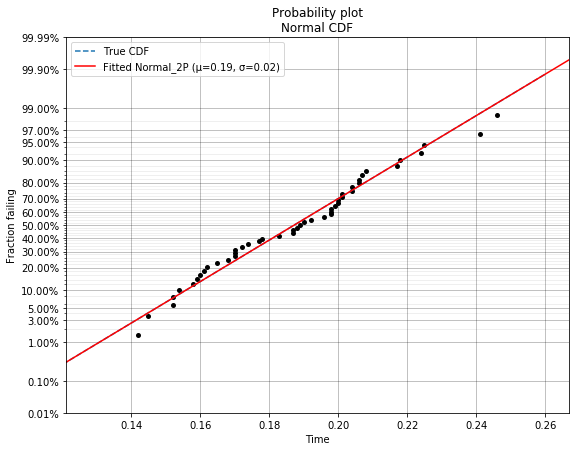

In [21]:
#Importamos la funcion Weibull
from reliability.Distributions import Normal_Distribution
#Importamos el metodo Weibull_probability_plot
from reliability.Probability_plotting import Normal_probability_plot
# Creamos un segundo objeto con los parametros ya encontrados
porosidad_dist = Normal_Distribution(mu=0.187277, sigma=0.024343)
#Graficamos la CDF de nuestro objeto junto con los datos de la variable. 
porosidad_dist.CDF(linestyle='--',label='True CDF')
Normal_probability_plot(failures=porosidad)
plt.show()

Función de densidad de probabilidades (PDF): Estas funciones (PDF - probability density function) permiten obtener información muy importante sobre la variable aleatoria. Los aspectos más importantes que pueden deducirse de este tipo de distribución son:
1. El dominio de la variable aleatoria.
2. El valor más probable de la variable aleatoria, que se ubicara debajo del punto más alto de la curva.
3. El grado de dispersión de la variable.

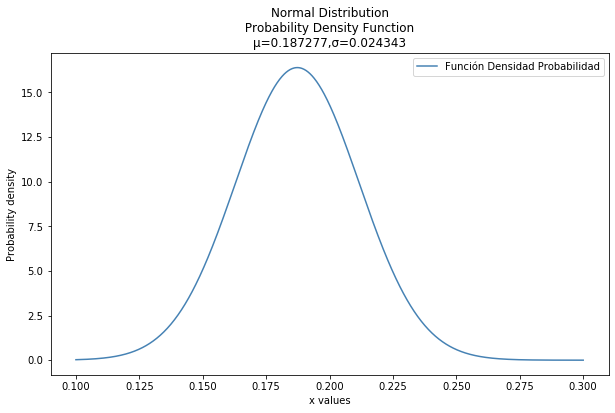

In [23]:
#Cambiamos el tamaño de la figura para verlo mejor
plt.figure(figsize=(10,6))
#Accedemos al método distribution.PDF del objeto creado de nuestra distribucion Normal
porosidad_dist.PDF(xmin=0.10, xmax=0.30,label='Función Densidad Probabilidad',color='steelblue')
plt.legend()
plt.show()

In [24]:
porosidad_dist.stats()

Descriptive statistics for Normal distribution with mu = 0.187277 and sigma = 0.024343
Mean =  0.187277
Median = 0.187277
Mode = 0.187277
5th quantile = 0.1472363281591203
95th quantile = 0.2273176718408797
Standard deviation = 0.024343
Variance = 0.000592581649
Skewness = 0
Excess kurtosis = 0


De la anterior podemos determinar que el valor medio esperado para la variable es 0.1872 und con una desviación estándar de 0.024 und.

### **Función de densidad acumulada (CDF):** 
Las funciones de densidad acumulada o distribuciones acumuladas directas F(x) (CDF - cumulative density function), se distinguen por su común forma de "S" y relacionan cualquier valor xi de la variable aleatoria "X", con la probabilidad de observar valores "menores o iguales" a dicho valor xi.

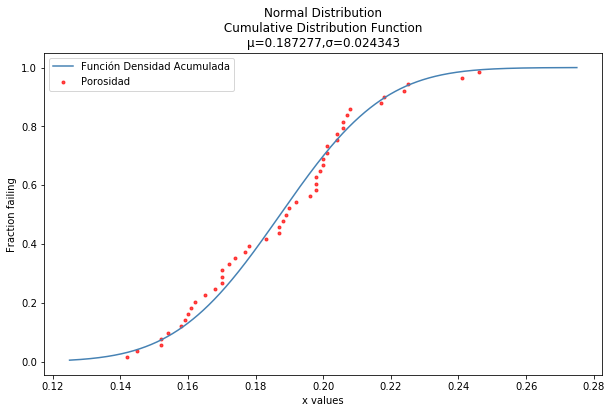

In [26]:
#Importamos la función para graficar los datos junto con la curva
from reliability.Probability_plotting import plot_points
#Cambiamos el tamaño de la figura para verlo mejor
plt.figure(0, figsize=(10,6))
#Accedemos al método distribution.CDF del objeto creado de nuestra distribución Weibull 2P
porosidad_dist.CDF(xmin=0.125, xmax=0.275, label='Función Densidad Acumulada',color='steelblue')
#Gratificamos los datos junto con la CDF
plot_points(failures=porosidad,func='CDF',label='Porosidad',color='red',alpha=0.7)
plt.legend()
plt.show()

De la anterior gráfica podemos saber cual es la probabilidad de que la variable tenga un valor menor o igual a xi; para este caso consultaremos la probabilidad de que la variable porosidad tenga un valor menor o igual a 0.20 und, obteniendo como respuestas un 70% de probabilidad.

In [28]:
#Consultamos un valor especifico para la variable a través del parámetro xval
porosidad_dist.CDF(xvals=0.20, show_plot=False)

0.6993929540381963

### **Función de densidad acumulada inversa (SF):** 

Las funciones de densidad acumulada inversa o distribuciones acumuladas inversas C(x) (SF - survival function) , se distinguen por su común forma descendente y relacionan cualquier valor xi de la variable aleatoria "X", con la probabilidad de observar valores "mayores o iguales" a dicho valor xi.

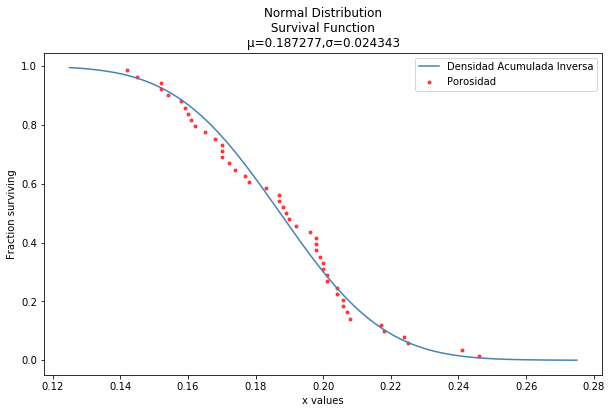

In [29]:
#Cambiamos el tamaño de la figura para verlo mejor
plt.figure(0, figsize=(10,6))
#Accedemos al método distribution.SF del objeto creado de nuestra distribución Weibull 2P
porosidad_dist.SF(xmin=0.125, xmax=0.275, label='Densidad Acumulada Inversa',color='steelblue')
#Gratificamos los datos junto con la SF
plot_points(failures=porosidad,func='SF',label='Porosidad',color='red',alpha=0.7)
plt.legend()
plt.show()

In [30]:
#Consultamos un valor especifico para la variable a través del parámetro xval
porosidad_dist.SF(xvals=0.20, show_plot=False)

0.30060704596180365

### **Resumen de gráficas:**
Podemos dibujar simultáneamente todas las gráficas disponibles de nuestra distribución de la siguiente manera:

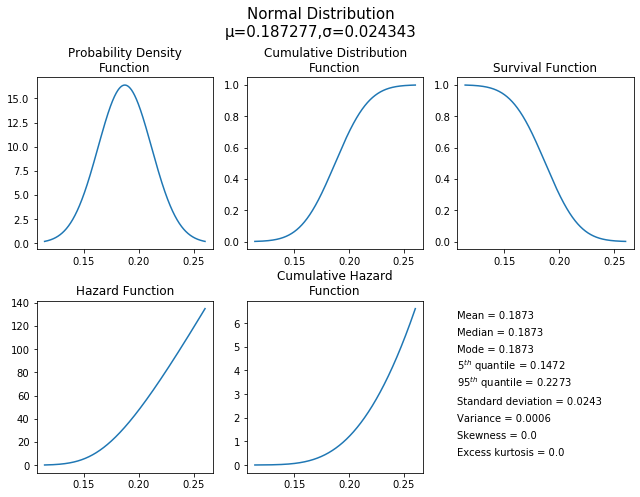

In [31]:
# Resumen de graficas
porosidad_dist.plot()
plt.show()

### **Conclusiones:**

Existes tres formas validas de presentar un informe de análisis de nuestra variable de ejemplo:

1. Presentando las gráficas de PDF y CDF con sus respectivos parámetros de forma, para este caso μ= 0.1872 y ς= 0.024343.
2. Caracterizando la variable en un rango de confianza especifico, para nuestro ejemplo se presento un valor probable de 0.1866–0.2014 und con un nivel de confianza del 95%.
3. Dando un estimado puntual (media, mediana o moda) y la desviación estándar de la distribución, para nuestro ejemplo el valor medio esperado para la variable es 0.1872 und con una desviación estándar de 0.024.

_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
ruslombia@gmail.com  
Bogotá – Colombia_  